In [184]:
# # run this once to use physical qbits

# from qiskit_ibm_runtime import QiskitRuntimeService
# import os
 
# QiskitRuntimeService.save_account(
#   token=os.environ["QISKIT_API_KEY"], # Use the 44-character API_KEY you created and saved from the IBM Quantum Platform Home dashboard
#   instance=os.environ["QISKIT_CRN"], # Optional
# )

In [185]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_ibm_runtime.fake_provider import FakeLagosV2
from qiskit_aer import AerSimulator

from scipy.special import kl_div
import numpy as np

In [ ]:
N_BITS = 6

qft_gate = QFT(N_BITS)
qc = QuantumCircuit(N_BITS)
qc.append(qft_gate, range(N_BITS))
qc.measure_all()

/tmp/ipykernel_19850/2370896133.py:3: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_gate = QFT(N_BITS)


In [187]:
from qiskit_aer import Aer

backend = FakeLagosV2()
ideal_simulator = Aer.get_backend("qasm_simulator")
hardware_simulator = AerSimulator.from_backend(backend=backend)

In [188]:
true_dist = np.full(2 ** N_BITS, 2 ** -N_BITS)
SHOTS = 1e5

In [189]:
transpiled_ideal = transpile(qc, backend=ideal_simulator, optimization_level=3)
ideal_result = ideal_simulator.run(transpiled_ideal, shots=SHOTS).result()

In [190]:
transpiled_hardware = transpile(qc, backend=hardware_simulator, optimization_level=3)
hardware_result = hardware_simulator.run(transpiled_hardware, shots=SHOTS).result()

In [191]:
from src import pass_manager

custom_pass = pass_manager.SimplifyAlternatingTripleCX()

transpiled_custom = custom_pass(transpiled_hardware)
custom_result = hardware_simulator.run(transpiled_custom, shots=SHOTS).result()

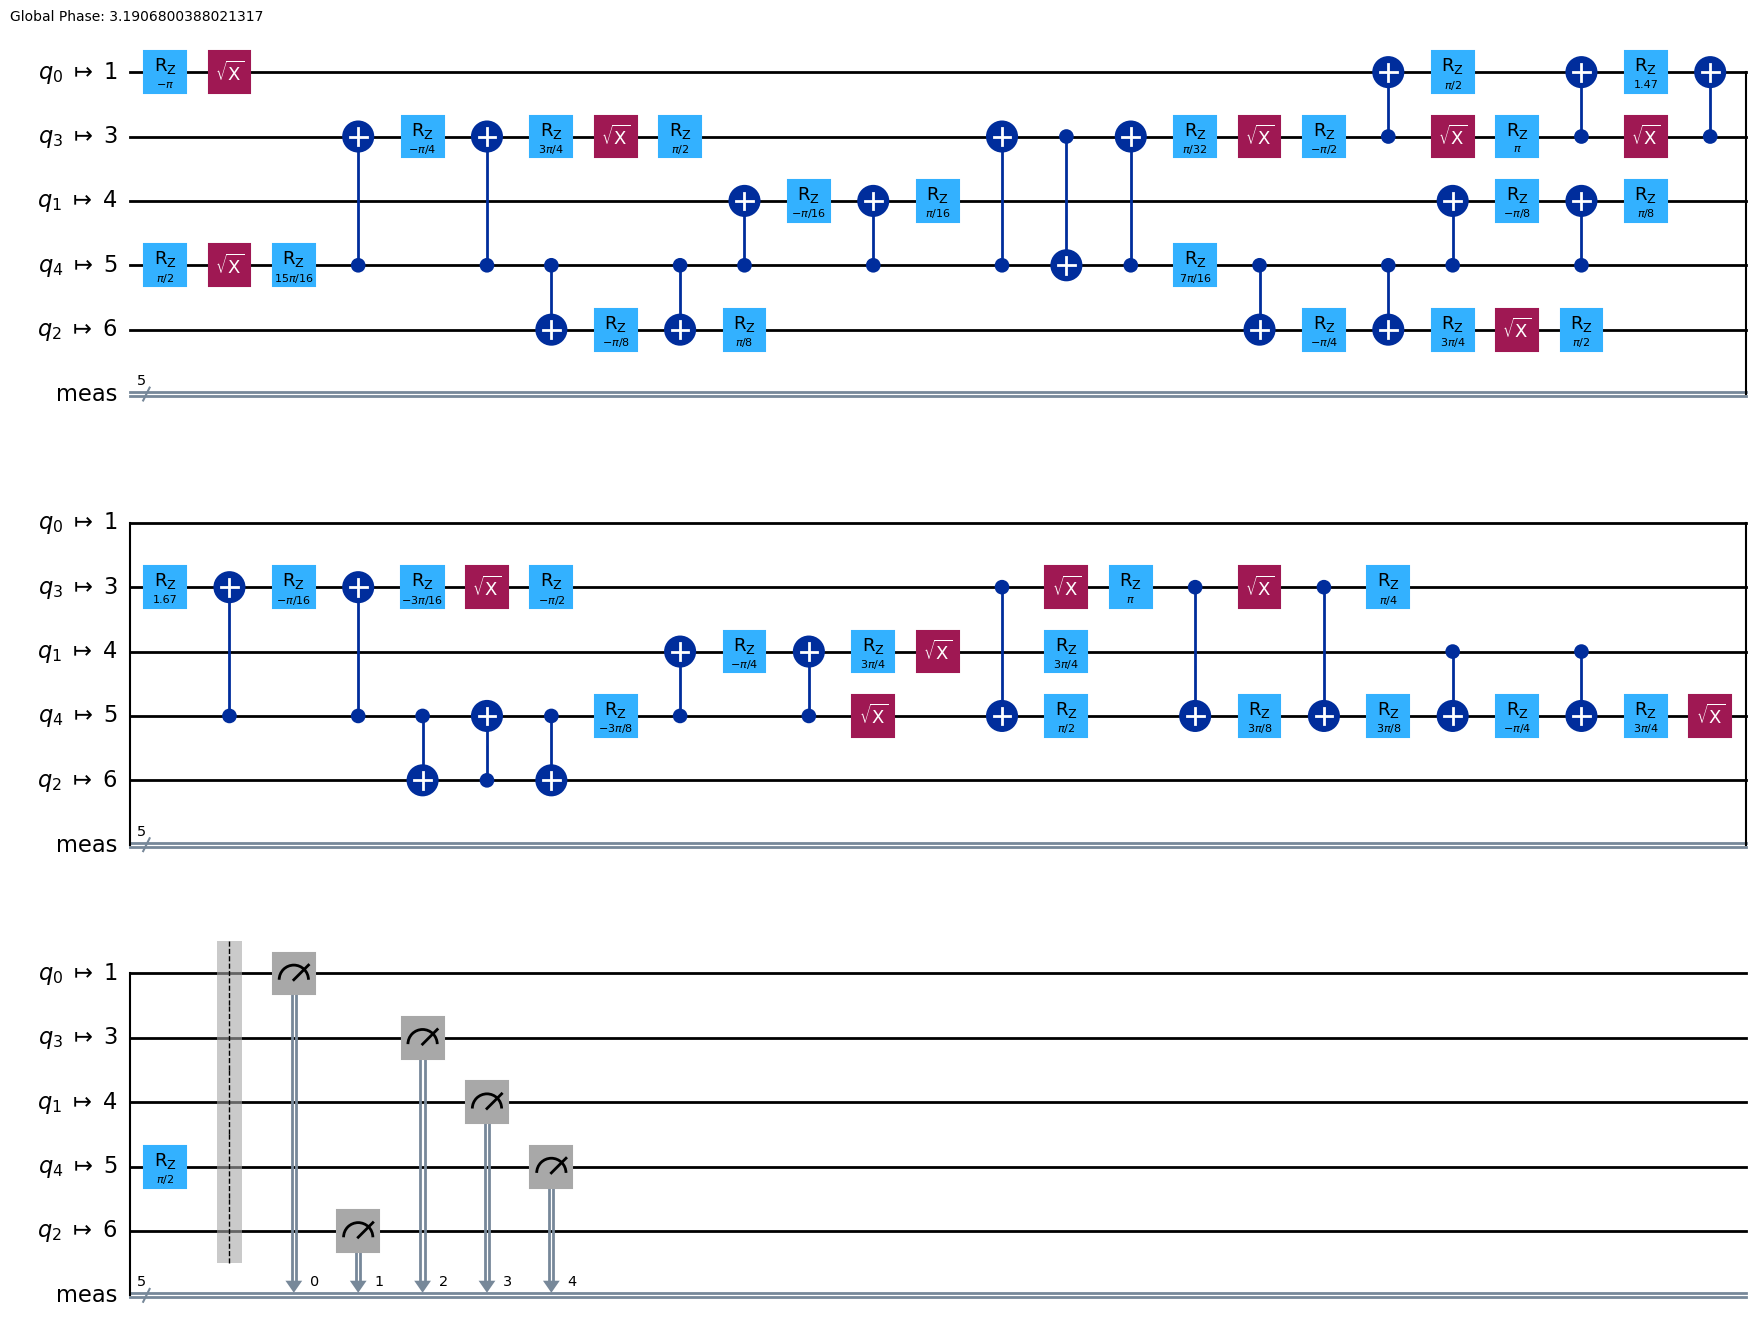

In [192]:
transpiled_hardware.draw("mpl")

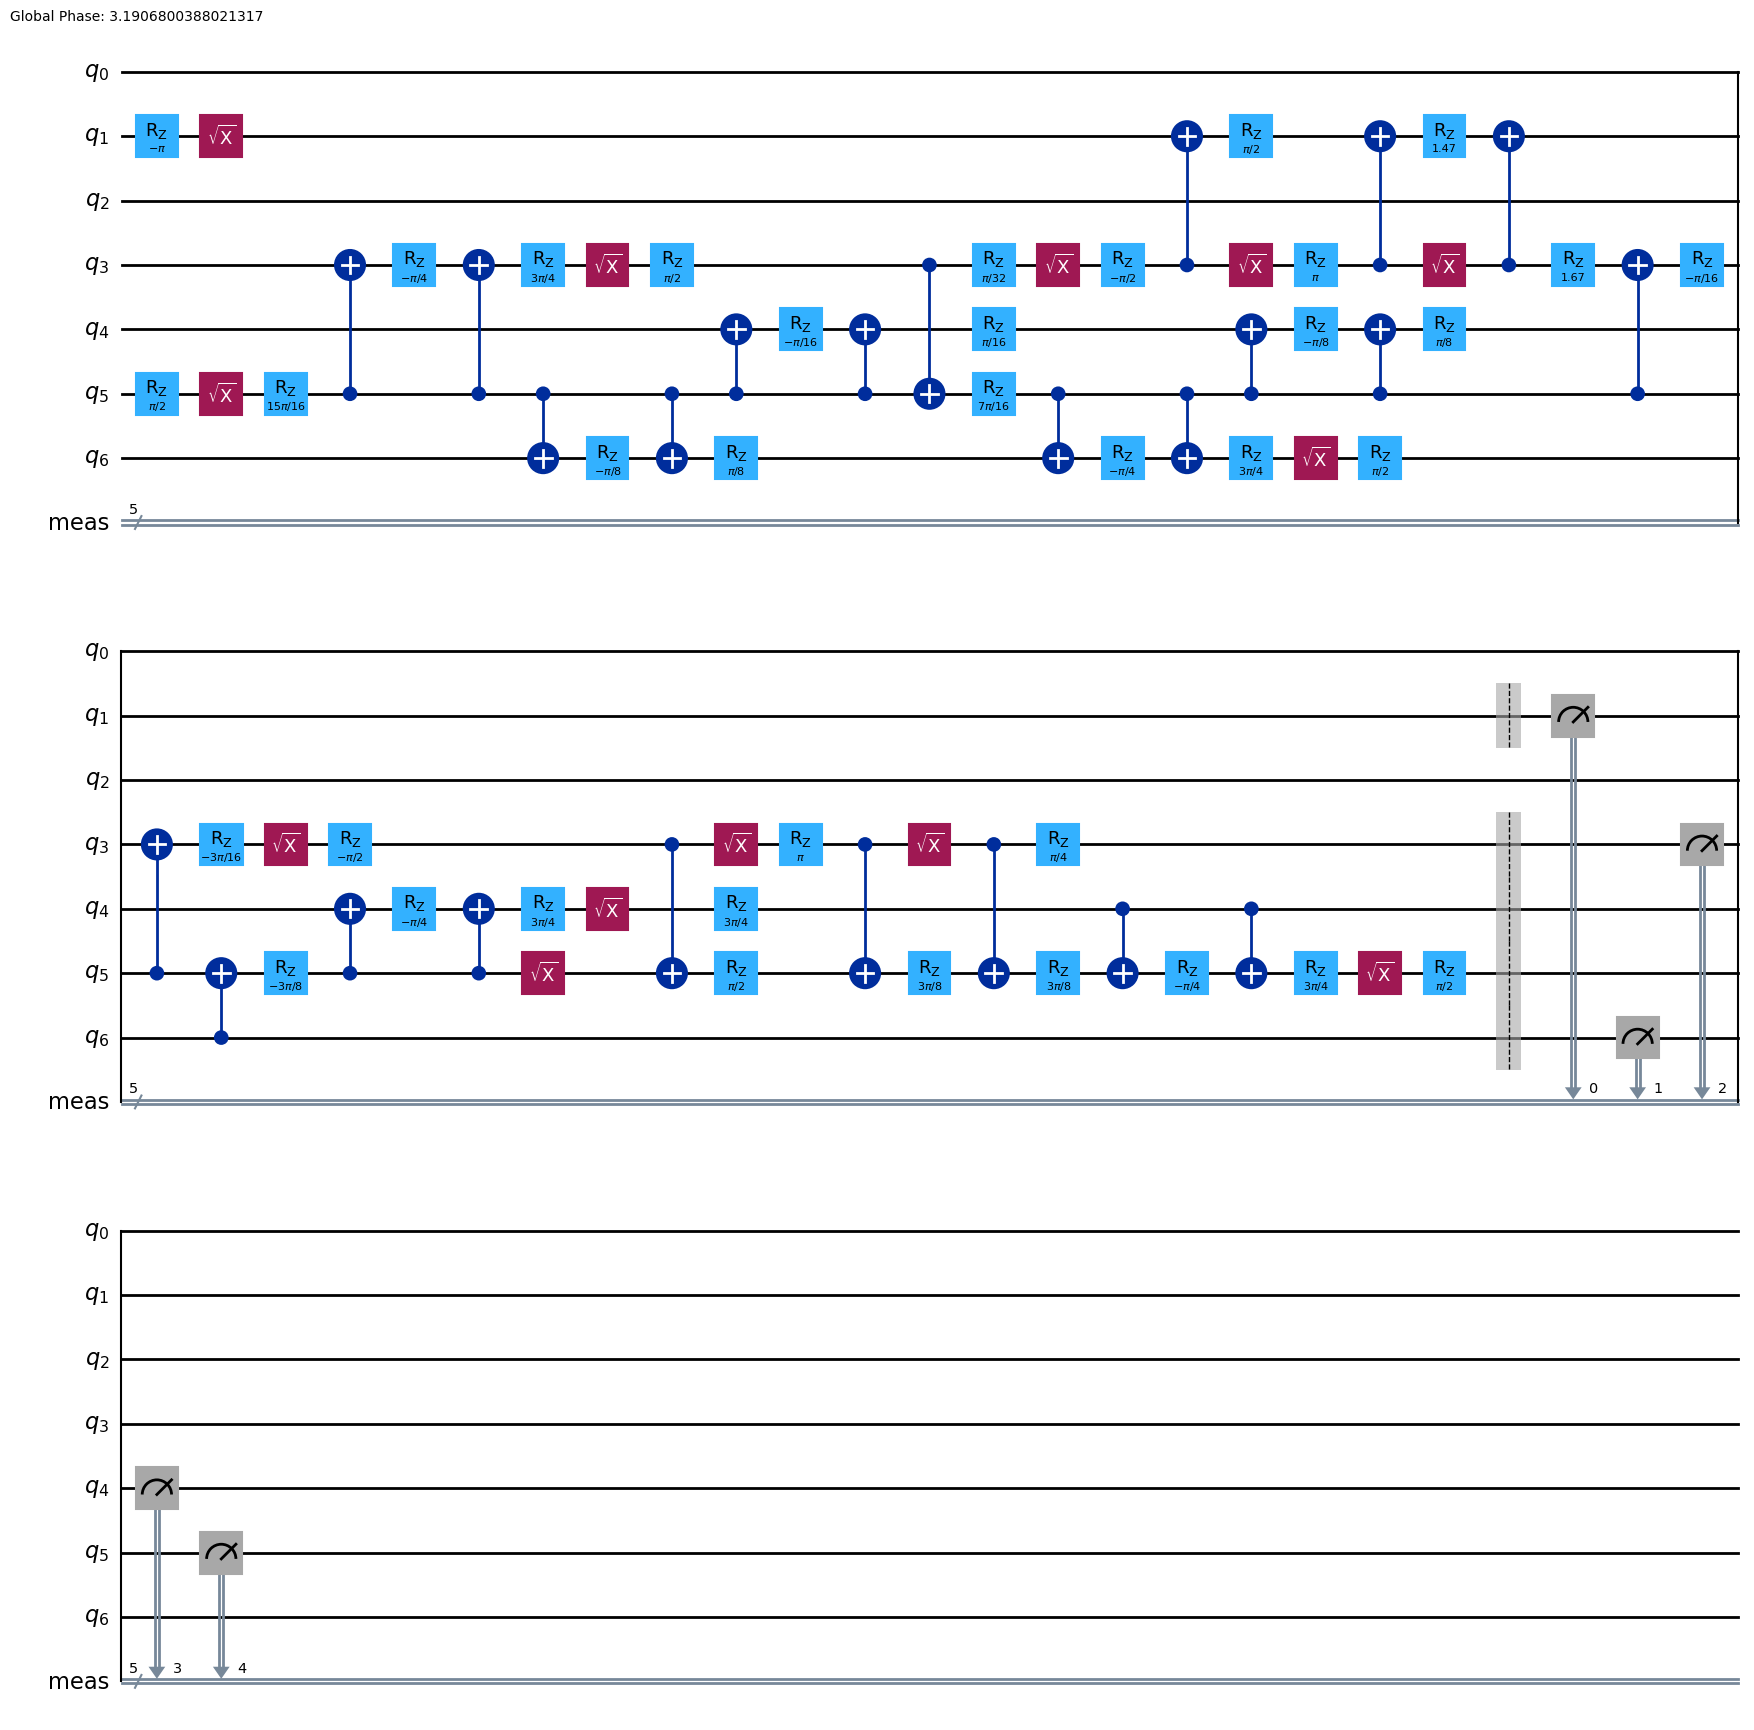

In [193]:
transpiled_custom.draw("mpl")

In [194]:
empirical_dist = np.array(list(ideal_result.get_counts(transpiled_ideal).values())) / SHOTS
np.sum(kl_div(true_dist, empirical_dist))

np.float64(0.00020630890771160607)

In [195]:
empirical_dist = np.array(list(hardware_result.get_counts(transpiled_hardware).values())) / SHOTS
np.sum(kl_div(true_dist, empirical_dist))

np.float64(0.0013792132176779631)

In [196]:
empirical_dist = np.array(list(custom_result.get_counts(transpiled_custom).values())) / SHOTS
np.sum(kl_div(true_dist, empirical_dist))

np.float64(0.0006339887945216172)